In [169]:
import psycopg2
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
try:
    conn = psycopg2.connect('dbname=nfl user=nfldb')
except: 
    print 'cannot connect'

cur = conn.cursor()

In [3]:
cur.execute("select * from player")
player = cur.fetchall()

players = []
for row in player:
    players.append(row)

players = pd.DataFrame(players)

In [4]:
cur.execute("select * from drive")
drive = cur.fetchall()

drives = []
for rows in drive:
    drives.append(rows)
    
drives = pd.DataFrame(drives)

In [5]:
cur.execute("select * from game")
game = cur.fetchall()

games = []
for rows in game:
    games.append(rows)
    
games = pd.DataFrame(games)

In [6]:
cur.execute("select * from team")
team = cur.fetchall()

teams = []
for rows in team:
    teams.append(rows)
    
teams = pd.DataFrame(teams)

In [7]:
cur.execute("select * from play_player")
play_player = cur.fetchall()

play_players = []
for rows in play_player:
    play_players.append(rows)
    
play_players = pd.DataFrame(play_players)

In [217]:
teams.columns = ['team_id','city','name']
teams.head(1)

,team_id,city,name
0,ARI,Arizona,Cardinals


In [9]:
play_players.columns = ['gsis_id','drive_id','play_id','player_id','team','defense_ast','defense_ffum',
                       'defense_fgblk','defense_frec','defense_frec_tds','defense_frec_yds',
                       'defense_int','defense_int_tds','defense_int_yds','defense_misc_tds',
                       'defense_misc_yds','defense_pass_def','defense_puntblk','defense_qbhit','defense_safe',
                       'defense_sk','defense_sk_yds','defense_tkl','defense_tkl_loss','defense_tkl_loss_yds',
                       'defense_tkl_primary','defense_xpblk','fumbles_forced','fumbles_lost','fumbles_notforced',
                       'fumbles_oob','fumbles_rec','fumbles_rec_tds','fumbles_rec_yds','fumbles_tot',
                       'kicking_all_yds','kicking_downed','kicking_fga','kicking_fgb','kicking_fgm','kicking_fgm_yds',
                       'kicking_fgmissed','kicking_fgmissed_yds','kicking_i20','kicking_rec',
                       'kicking_rec_tds','kicking_tot','kicking_touchback','kicking_xpa','kicking_xpb','kicking_xpmade',
                       'kicking_xpmissed','kicking_yds','kickret_fair','kickret_oob','kickret_ret','kickret_tds',
                       'kickret_touchback','kickret_yds','passing_att','passing_cmp','passing_cmp_air_yds',
                       'passing_incmp','passing_incmp_air_yds','passing_int','passing_sk','passing_sk_yds',
                       'passing_tds','passing_twopta','passing_twoptm','passing_twoptmissed','passing_yds',
                       'punting_blk','punting_i20','punting_tot','punting_touchback','punting_yds','puntret_downed',
                       'puntret_fair','puntret_oob','puntret_tds','puntret_tot','puntret_touchback','puntret_yds',
                       'receiving_rec','receiving_tar','receiving_tds','receiving_twopta','receiving_twoptm',
                       'receiving_twoptmissed','receiving_yac_yds','receiving_yds','rushing_att','rushing_loss',
                       'rushing_loss_yds','rushing_tds','rushing_twopta','rushing_twoptm','rushing_twoptmissed','rushing_yds']
play_players.head(3)

,gsis_id,drive_id,play_id,player_id,team,defense_ast,defense_ffum,defense_fgblk,defense_frec,defense_frec_tds,...,receiving_yac_yds,receiving_yds,rushing_att,rushing_loss,rushing_loss_yds,rushing_tds,rushing_twopta,rushing_twoptm,rushing_twoptmissed,rushing_yds
0,2009081350,1,36,00-0019676,ARI,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2009081350,1,59,00-0026163,PIT,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-1
2,2009081350,1,59,00-0026190,ARI,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
players.columns = ['player_id','gsis_name','full_name','first_name','last_name',
                   'team','position','profile_id','profile_url','uniform_number',
                   'birthdate','college','height','weight','years_pro','status']
players.shape

(7450, 16)

In [11]:
drives.columns = ['gsis_id','drive_id','start_field','start_time','end_field',
                  'end_time','pos_team','pos_time','first_downs','result','penalty_yards',
                  'yards_gained','play_count','time_inserted','time_updated']
drives.head(3)

,gsis_id,drive_id,start_field,start_time,end_field,end_time,pos_team,pos_time,first_downs,result,penalty_yards,yards_gained,play_count,time_inserted,time_updated
0,2009081350,1,(-30),"(Q1,0)",(-11),"(Q1,239)",PIT,(239),1,Punt,4,15,6,2013-09-03 22:36:23.420121-07:00,2013-09-03 22:36:23.420121-07:00
1,2009081350,2,(-35),"(Q1,239)",(7),"(Q1,526)",ARI,(287),3,Punt,0,42,10,2013-09-03 22:36:23.420121-07:00,2013-09-03 22:36:23.420121-07:00
2,2009081350,3,(-42),"(Q1,526)",(-14),"(Q1,870)",PIT,(344),2,Punt,-5,33,8,2013-09-03 22:36:23.420121-07:00,2013-09-03 22:36:23.420121-07:00


In [12]:
games.columns = ['gsis_id','gamekey','start_time','week','day_of_week','season_year',
                 'season_type','finished','home_team','home_score','home_score_q1',
                 'home_score_q2','home_score_q3','home_score_q4','home_score_q5',
                 'home_turnovers','away_team','away_score','away_score_q1','away_score_q2',
                 'away_score_q3','away_score_q4','away_score_q5','away_turnovers',
                 'time_inserted','time_updated']
games = games.drop(['time_inserted','time_updated','start_time','finished'], axis=1)

In [13]:
games['home_outcome'] = games['home_score'] - games['away_score']
games['home_outcome'] = games['home_outcome'].apply(lambda x: 'tie' if x == 0 else 'win' if x > 0 else 'loss')
games['away_outcome'] = games['home_outcome'].apply(lambda x: 'loss' if x == 'win' else 'win')
games = games[games["home_outcome"] != 'tie']
#create an outcome column and changed to either win or loss based on home and away score with home and away team

In [14]:
home_score = zip(games['home_team'], games['home_score'])
away_score = zip(games['away_team'], games['away_score'])

winner = []
for k, v in zip(home_score, away_score):
    if k[1] > v[1]:
        winner.append(k[0])
    elif k[1] < v[1]:
        winner.append(v[0])
    else:
        winner.append('tie')
        
games['winner'] = winner

In [15]:
def games_subsetter(df, suffix):
    column_select = [x for x in games.columns if suffix in x]
    games_subset = games[['gsis_id','season_type'] + column_select]
    games_subset.columns = [x for x in games_subset.columns]
    return games_subset

home = games_subsetter(games, 'home')
away = games_subsetter(games, 'away')
#subset teams so that 

In [16]:
column = ['gsis_id', 'type', 'team', 'score', 'score_q1',
       'score_q2', 'score_q3', 'score_q4', 'score_q5',
       'turnovers', 'outcome']
home.columns = [column]
away.columns = [column]

In [17]:
away['location'] = 'away'
home['location'] = 'home'

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
sep_games = (home, away)
game_scores = pd.concat(sep_games)
outcome_type = game_scores[['gsis_id','team','outcome','location','type']]


In [19]:
outcome_type.outcome.value_counts()

win     2378
loss    2378
Name: outcome, dtype: int64

In [20]:
play_players.head()

,gsis_id,drive_id,play_id,player_id,team,defense_ast,defense_ffum,defense_fgblk,defense_frec,defense_frec_tds,...,receiving_yac_yds,receiving_yds,rushing_att,rushing_loss,rushing_loss_yds,rushing_tds,rushing_twopta,rushing_twoptm,rushing_twoptmissed,rushing_yds
0,2009081350,1,36,00-0019676,ARI,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2009081350,1,59,00-0026163,PIT,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-1
2,2009081350,1,59,00-0026190,ARI,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009081350,1,80,00-0017162,PIT,0,0,0,0,0,...,0,6,0,0,0,0,0,0,0,0
4,2009081350,1,80,00-0023443,ARI,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
team_stats = pd.merge(play_players, outcome_type, how='left', on=['gsis_id','team'])

In [22]:
team_stats.groupby(['team','outcome','location']).mean().head()

drive_id      play_id  defense_ast  defense_ffum  \
team outcome location                                                      
ARI  loss    away      13.010155  2094.040154     0.078324      0.003035   
             home      12.620080  2211.247813     0.048105      0.003098   
     win     away      12.145372  2063.123910     0.048290      0.005030   
             home      12.139804  2177.685821     0.046017      0.005256   
ATL  loss    away      11.741951  2089.110922     0.095979      0.002794   

                       defense_fgblk  defense_frec  defense_frec_tds  \
team outcome location                                                  
ARI  loss    away           0.000584      0.002335          0.000233   
             home           0.000547      0.002004          0.000182   
     win     away           0.000838      0.003856          0.000000   
             home           0.000818      0.004555          0.000818   
ATL  loss    away           0.000121      0.001822          0.000121   

                       defense_frec_yds  defense_int  defense_int_tds  \
team outcome location                                                   
ARI  loss    away              0.013073     0.003969         0.000233   
             home              0.003462     0.002187         0.000182   
     win     away              0.004192     0.007378         0.000671   
             home              0.037024     0.007358         0.001635   
ATL  loss    away              0.003523     0.003645         0.000364   

                          ...       receiving_yac_yds  receiving_yds  \
team outcome location     ...                                          
ARI  loss    away         ...                0.426987       1.144741   
             home         ...                0.525692       1.339832   
     win     away         ...                0.522636       1.313883   
             home         ...                0.570194       1.370941   
ATL  loss    away         ...                0.557891       1.318673   

                       rushing_att  rushing_loss  rushing_loss_yds  \
team outcome location                                                
ARI  loss    away         0.106222           0.0               0.0   
             home         0.103499           0.0               0.0   
     win     away         0.155936           0.0               0.0   
             home         0.143658           0.0               0.0   
ATL  loss    away         0.104119           0.0               0.0   

                       rushing_tds  rushing_twopta  rushing_twoptm  \
team outcome location                                                
ARI  loss    away         0.002801        0.000350        0.000117   
             home         0.003098        0.000000        0.000000   
     win     away         0.005198        0.000168        0.000168   
             home         0.004205        0.000234        0.000117   
ATL  loss    away         0.002308        0.000121        0.000000   

                       rushing_twoptmissed  rushing_yds  
team outcome location                                    
ARI  loss    away                 0.000233     0.423369  
             home                 0.000000     0.403608  
     win     away                 0.000000     0.626928  
             home                 0.000117     0.522658  
ATL  loss    away                 0.000121     0.421334  

[5 rows x 97 columns]

In [23]:
def team_stats_subsetter(df, suffix):
    column_select = [x for x in team_stats.columns if suffix in x]
    team_stats_subset = team_stats[['gsis_id','drive_id','play_id','player_id','team','outcome','location','type'] + column_select]
    team_stats_subset.columns = [x for x in team_stats_subset.columns]
    return team_stats_subset

rushing = team_stats_subsetter(team_stats, 'rushing')
passing = team_stats_subsetter(team_stats, 'passing')
receiving = team_stats_subsetter(team_stats, 'receiving')
kicking = team_stats_subsetter(team_stats, 'kick')
punting = team_stats_subsetter(team_stats, 'punt')
fumble = team_stats_subsetter(team_stats, 'fumble')
defense = team_stats_subsetter(team_stats, 'defense')

In [24]:
offense = pd.merge(passing, rushing, left_index=True, right_index=True, how='outer')
offense = pd.merge(offense, receiving, left_index=True, right_index=True, how='outer')
offense = offense.drop(['gsis_id_y','drive_id_y','play_id_y','player_id_y','team_y','outcome_y','location_y', 'gsis_id','drive_id','play_id','player_id','team','location','outcome'], axis=1)

In [25]:
special = pd.merge(kicking, punting, left_index=True, right_index=True, how='outer')
special = special.drop(['gsis_id_y','drive_id_y','play_id_y','player_id_y','team_y','outcome_y','location_y'], axis=1)

In [26]:
defense = pd.merge(defense, fumble, left_index=True, right_index=True, how='outer')
defense = defense.drop(['gsis_id_y','drive_id_y','play_id_y','player_id_y','team_y','outcome_y','location_y','drive_id_x','play_id_x'], axis=1)

In [27]:
defense.head()

,gsis_id_x,player_id_x,team_x,outcome_x,location_x,type_x,defense_ast,defense_ffum,defense_fgblk,defense_frec,...,defense_xpblk,type_y,fumbles_forced,fumbles_lost,fumbles_notforced,fumbles_oob,fumbles_rec,fumbles_rec_tds,fumbles_rec_yds,fumbles_tot
0,2009081350,00-0019676,ARI,loss,away,Preseason,0,0,0,0,...,0,Preseason,0,0,0,0,0,0,0,0
1,2009081350,00-0026163,PIT,win,home,Preseason,0,0,0,0,...,0,Preseason,0,0,0,0,0,0,0,0
2,2009081350,00-0026190,ARI,loss,away,Preseason,0,0,0,0,...,0,Preseason,0,0,0,0,0,0,0,0
3,2009081350,00-0017162,PIT,win,home,Preseason,0,0,0,0,...,0,Preseason,0,0,0,0,0,0,0,0
4,2009081350,00-0023443,ARI,loss,away,Preseason,0,0,0,0,...,0,Preseason,0,0,0,0,0,0,0,0


In [28]:
defense_group = defense.groupby(['gsis_id_x','team_x','outcome_x','location_x','type_x']).sum()

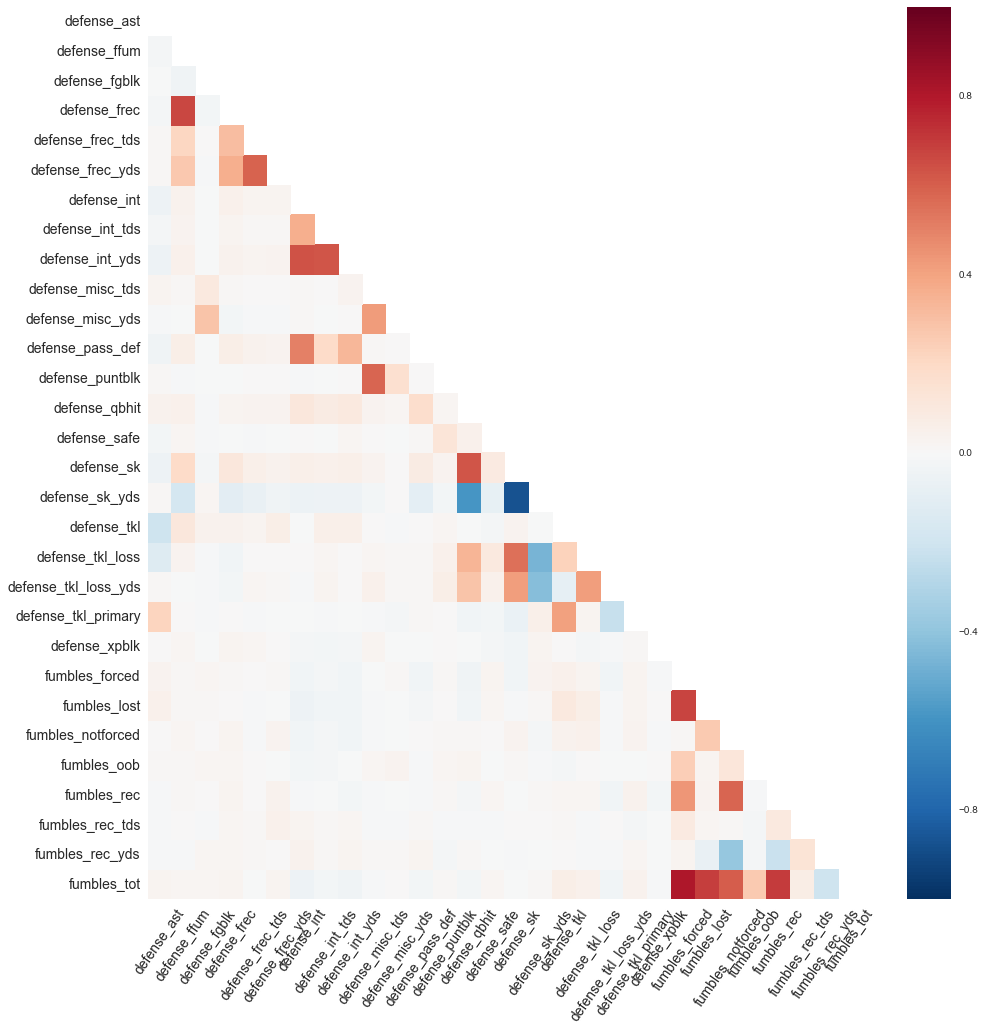

In [215]:
def_corr = defense_group.corr()

fig, ax = plt.subplots(figsize=(16,16))

mask = np.zeros_like(def_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(def_corr, mask=mask)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=55)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

In [30]:
drives.rename(columns={'pos_team':'team'}, inplace=True)
drives = pd.merge(drives, outcome_type, how='left', on=['gsis_id','team'])
drives.pos_time = drives.pos_time.apply(lambda x: x.strip('()')).astype(int)

In [31]:
drives.head()

,gsis_id,drive_id,start_field,start_time,end_field,end_time,team,pos_time,first_downs,result,penalty_yards,yards_gained,play_count,time_inserted,time_updated,outcome,location,type
0,2009081350,1,(-30),"(Q1,0)",(-11),"(Q1,239)",PIT,239,1,Punt,4,15,6,2013-09-03 22:36:23.420121-07:00,2013-09-03 22:36:23.420121-07:00,win,home,Preseason
1,2009081350,2,(-35),"(Q1,239)",(7),"(Q1,526)",ARI,287,3,Punt,0,42,10,2013-09-03 22:36:23.420121-07:00,2013-09-03 22:36:23.420121-07:00,loss,away,Preseason
2,2009081350,3,(-42),"(Q1,526)",(-14),"(Q1,870)",PIT,344,2,Punt,-5,33,8,2013-09-03 22:36:23.420121-07:00,2013-09-03 22:36:23.420121-07:00,win,home,Preseason
3,2009081350,4,(-29),"(Q1,870)",(11),"(Q2,244)",ARI,274,3,Punt,0,40,10,2013-09-03 22:36:23.420121-07:00,2013-09-03 22:36:23.420121-07:00,loss,away,Preseason
4,2009081350,5,(-39),"(Q2,244)",(18),"(Q2,437)",PIT,193,1,Field Goal,-5,62,6,2013-09-03 22:36:23.420121-07:00,2013-09-03 22:36:23.420121-07:00,win,home,Preseason


In [32]:
drive_group_unstack = drives.groupby(['gsis_id','team','result'])['drive_id'].count().unstack().reset_index()

In [33]:
final_df = team_stats.groupby(['gsis_id','team']).sum().reset_index()

In [34]:
final_df = pd.merge(final_df, drive_group_unstack, how='left', on=['gsis_id','team'])

In [35]:
final_df = final_df.rename(columns = {'': 'will_drop'})
final_df = final_df.drop('will_drop', 1)
final_df.fillna(0, inplace=True)
final_df.drop('UNKNOWN', axis=1, inplace=True)

In [36]:
final_df = pd.merge(final_df, outcome_type, how='left', on=['gsis_id','team'])

In [37]:
final_df = final_df.dropna(subset=['outcome'])

In [38]:
final_df['outcome'] = final_df['outcome'].apply(lambda x: 1 if x == 'win' else 0)
final_df['location'] = final_df['location'].apply(lambda x: 1 if x == 'home' else 0)

In [39]:
final_df['type'].fillna('Regular', inplace=True)
final_df = final_df.loc[final_df['type'] != 'Preseason']
final_df.reset_index(drop=True, inplace=True)

In [40]:
final_df.corr().unstack().order(kind='quicksort', ascending=False)[137:]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


kicking_fgm_yds        Field Goal               0.958992
Field Goal             kicking_fgm_yds          0.958992
kicking_fgm            kicking_fgm_yds          0.958830
kicking_fgm_yds        kicking_fgm              0.958830
passing_twoptmissed    receiving_twoptmissed    0.955984
receiving_twoptmissed  passing_twoptmissed      0.955984
Missed FG              kicking_fgmissed_yds     0.955262
kicking_fgmissed_yds   Missed FG                0.955262
Touchdown              kicking_xpmade           0.954216
kicking_xpmade         Touchdown                0.954216
Fumble                 fumbles_lost             0.944792
fumbles_lost           Fumble                   0.944792
kicking_fgm            kicking_fga              0.900842
kicking_fga            kicking_fgm              0.900842
                       Field Goal               0.900497
Field Goal             kicking_fga              0.900497
kickret_yds            kickret_ret              0.882820
kickret_ret            kickret_

In [41]:
final_df.drop(['type','drive_id','play_id','rushing_loss','rushing_loss_yds',
               'kickret_oob','kickret_touchback','kicking_rec_tds','kicking_downed',
               'puntret_downed','puntret_oob','puntret_touchback','kicking_yds',
               'passing_incmp_air_yds', 'End of Game','End of Half','passing_yds',
               'passing_cmp','kicking_fgm','punting_tot','passing_att','kicking_xpa',
               'kicking_fgmissed_yds','passing_twopta','kicking_fgmissed','punting_tot',
              'fumbles_lost','kicking_fga','kicking_fga','punting_blk'], 1, inplace=True)
#dropped all columns with high correlation or 'zero' values

In [42]:
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

final_df = change_column_order(final_df, 'outcome', 1)
#move a column from the end to the front

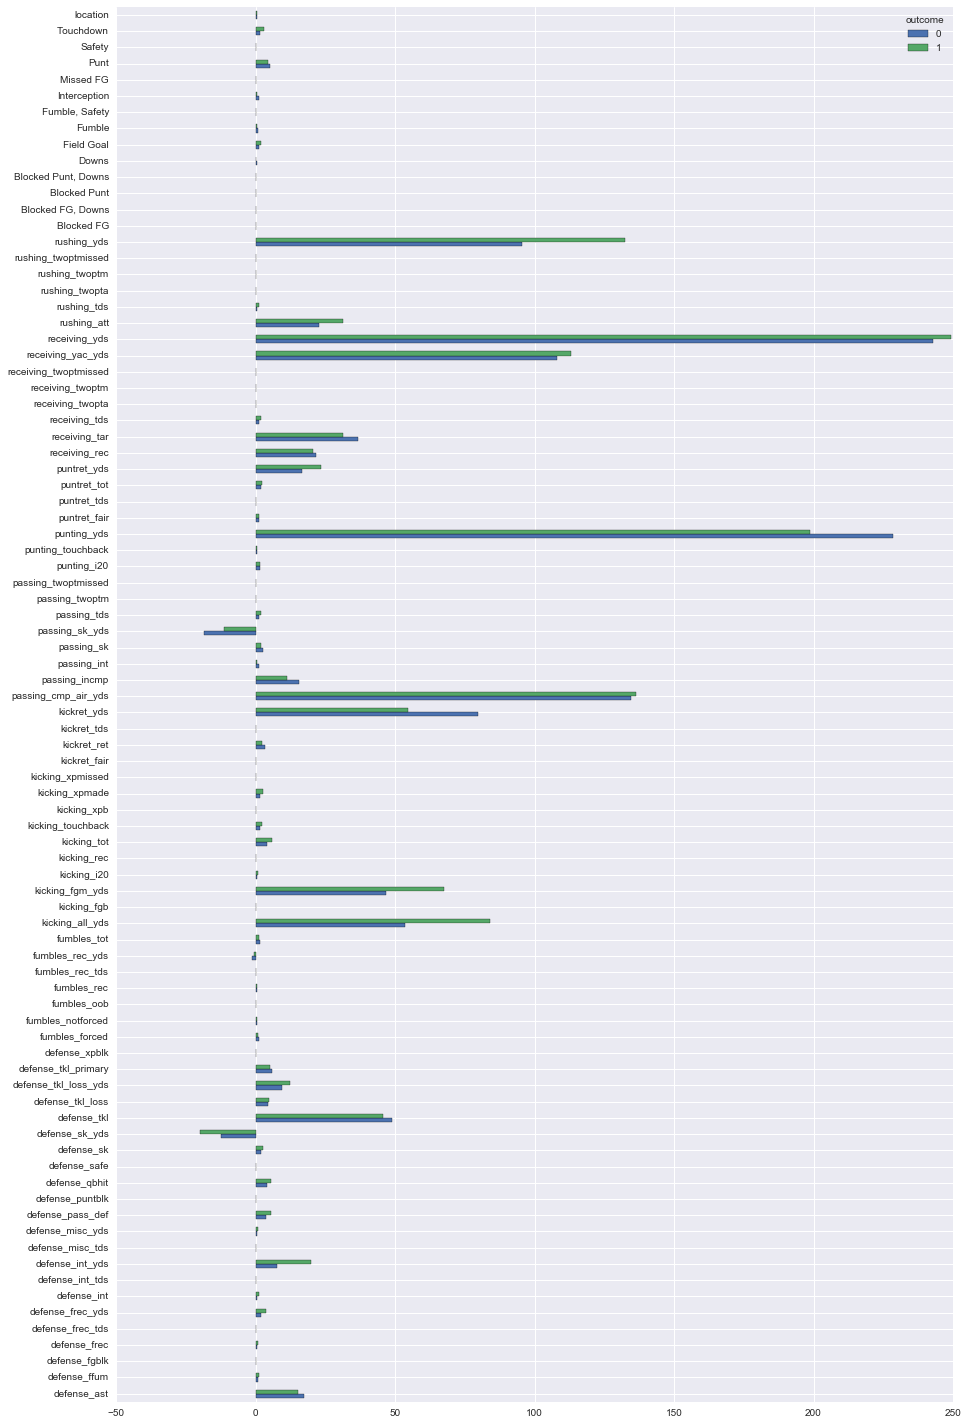

In [43]:
final_df.groupby('outcome').mean().T.plot(kind='barh', figsize=(15, 25), legend=True)

In [44]:
final_df_2 = final_df

In [45]:
final_df = pd.get_dummies(final_df, columns=['team'])

In [46]:
final_df.outcome.value_counts()

1    1860
0    1860
Name: outcome, dtype: int64

###  DF #1 STOPPING POINT AND SAVE CLEANING

In [47]:
#final_df.to_csv('final_df.csv')

###  DF #2  CLEANING

In [48]:
games_copy = pd.DataFrame(games)

In [227]:
games_copy.head()

,gsis_id,week,day_of_week,season_year,season_type,home_team,home_score,home_turnovers,away_team,away_score,away_turnovers,home_outcome,away_outcome,winner
0,2014122106,16,Sunday,2014,Regular,PIT,20,0,KC,12,0,win,loss,PIT
1,2015102500,7,Sunday,2015,Regular,JAC,34,1,BUF,31,0,win,loss,JAC
2,2014122107,16,Sunday,2014,Regular,TB,3,2,GB,20,2,loss,win,GB
3,2014122108,16,Sunday,2014,Regular,STL,27,0,NYG,37,1,loss,win,NYG
4,2014122109,16,Sunday,2014,Regular,DAL,42,3,IND,7,2,win,loss,DAL


In [49]:
games_copy.drop(['gamekey',
                 'home_score_q5','home_score_q4','home_score_q3','home_score_q2','home_score_q1',
                 'away_score_q5','away_score_q4','away_score_q3','away_score_q2','away_score_q1'], axis=1, inplace=True)

In [50]:
def games_copy_stats_subsetter(df, suffix):
    column_select = [x for x in games_copy.columns if suffix in x]
    games_copy_subset = games_copy[['gsis_id','week','day_of_week','season_year','season_type'] + column_select]
    games_copy_subset.columns = [x for x in games_copy_subset.columns]
    return games_copy_subset

h = games_copy_stats_subsetter(games_copy, 'home')
a = games_copy_stats_subsetter(games_copy, 'away')

In [51]:
a.columns = ['gsis_id', 'week', 'day_of_week', 'season_year', 'season_type',
       'team', 'score', 'turnovers', 'outcome']

In [52]:
h.columns = ['gsis_id', 'week', 'day_of_week', 'season_year', 'season_type',
       'team', 'score', 'turnovers', 'outcome']

In [53]:
h['location'] = 'home'
a['location'] = 'away'
g = [h, a]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [54]:
g = pd.concat(g, ignore_index=True)

In [55]:
ts = team_stats.groupby(['gsis_id','team']).sum().reset_index()

In [56]:
ts = ts[ts.gsis_id != '2012111110']

In [57]:
ts = ts[ts.gsis_id != '2013112403']

In [58]:
ts = ts[ts.gsis_id != '2014101202']

In [250]:
df = pd.merge(ts, g, how='left', on=['gsis_id','team'])
df = df[df.season_type != 'Preseason']
df.drop(['season_year','season_type','drive_id','play_id',
         'drive_id','play_id','rushing_loss','rushing_loss_yds',
        'kickret_oob','kickret_touchback','kicking_rec_tds','kicking_downed',
        'puntret_downed','puntret_oob','puntret_touchback','kicking_yds',
        'passing_incmp_air_yds','passing_yds','passing_cmp','kicking_fgm',
        'punting_tot','passing_att','kicking_xpa','kicking_fgmissed_yds',
         'passing_twopta','kicking_fgmissed','punting_tot','fumbles_lost',
         'kicking_fga','kicking_fga','punting_blk'], axis=1, inplace=True)

In [251]:
df['outcome'] = df['outcome'].apply(lambda x: 1 if x == 'win' else 0)

In [252]:
home_df = df[df.location == 'home']
away_df = df[df.location == 'away']

In [253]:
final_df_2 = pd.merge(home_df, away_df, how='left', on=['gsis_id','day_of_week','week'])

In [254]:
final_df_2.location_x = 1
final_df_2.location_y = 0

In [255]:
gw = games[['gsis_id','winner']]

In [256]:
final_df_2 = pd.merge(final_df_2, gw, how='left', on='gsis_id')
final_df_2.drop(['outcome_x','outcome_y'], axis=1, inplace=True)

In [258]:
final_df_2.head()

,gsis_id,winner,team_x,team_y,score_x,score_y,week,day_of_week,defense_ast_x,defense_ffum_x,...,receiving_yac_yds_y,receiving_yds_y,rushing_att_y,rushing_tds_y,rushing_twopta_y,rushing_twoptm_y,rushing_twoptmissed_y,rushing_yds_y,turnovers_y,location_y
0,2009091000,PIT,PIT,TEN,13,10,1,Thursday,25,1,...,88,244,25,0,0,0,0,86,2,0
1,2009091300,ATL,ATL,MIA,19,7,1,Sunday,5,3,...,88,176,22,0,0,0,0,96,0,0
2,2009091301,BAL,BAL,KC,38,24,1,Sunday,10,1,...,82,177,17,0,0,0,0,29,0,0
3,2009091302,PHI,CAR,PHI,10,38,1,Sunday,6,1,...,45,102,32,1,0,0,0,185,1,0
4,2009091303,DEN,CIN,DEN,7,12,1,Sunday,26,0,...,146,243,20,0,0,0,0,75,0,0


In [257]:
final_df_2 = change_column_order(final_df_2, 'winner', 1)
final_df_2 = change_column_order(final_df_2, 'team_x', 2)
final_df_2 = change_column_order(final_df_2, 'team_y', 3)
final_df_2 = change_column_order(final_df_2, 'score_x', 4)
final_df_2 = change_column_order(final_df_2, 'score_y', 5)
final_df_2 = change_column_order(final_df_2, 'week', 6)
final_df_2 = change_column_order(final_df_2, 'day_of_week', 7)

In [244]:
week_day = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}

In [246]:
final_df_2.day_of_week = final_df_2.day_of_week.replace(week_day)

In [68]:
final_df_2['winner'] = final_df_2.winner == final_df_2.team_x

In [69]:
final_df_2.winner = final_df_2.winner.apply(lambda x: 1 if x == True else 0)

In [70]:
final_df_2.head()

,gsis_id,winner,team_x,team_y,score_x,score_y,week,day_of_week,defense_ast_x,defense_ffum_x,...,receiving_yac_yds_y,receiving_yds_y,rushing_att_y,rushing_tds_y,rushing_twopta_y,rushing_twoptm_y,rushing_twoptmissed_y,rushing_yds_y,turnovers_y,location_y
0,2009091000,1,PIT,TEN,13,10,1,4,25,1,...,88,244,25,0,0,0,0,86,2,0
1,2009091300,1,ATL,MIA,19,7,1,7,5,3,...,88,176,22,0,0,0,0,96,0,0
2,2009091301,1,BAL,KC,38,24,1,7,10,1,...,82,177,17,0,0,0,0,29,0,0
3,2009091302,0,CAR,PHI,10,38,1,7,6,1,...,45,102,32,1,0,0,0,185,1,0
4,2009091303,0,CIN,DEN,7,12,1,7,26,0,...,146,243,20,0,0,0,0,75,0,0


###  DF #2 STOPPING POINT AND SAVE CLEANING

In [259]:
#final_df_2.to_csv('final_df_2_beforeDummy.csv')

In [71]:
#final_df_2.to_csv('final_df_2.csv')

###  DF #3 STOPPING POINT AND SAVE CLEANING

In [86]:
final_df_3 = pd.DataFrame(final_df_2)

In [87]:
final_df_3.head()

,gsis_id,winner,team_x,team_y,score_x,score_y,week,day_of_week,defense_ast_x,defense_ffum_x,...,receiving_yac_yds_y,receiving_yds_y,rushing_att_y,rushing_tds_y,rushing_twopta_y,rushing_twoptm_y,rushing_twoptmissed_y,rushing_yds_y,turnovers_y,location_y
0,2009091000,1,PIT,TEN,13,10,1,4,25,1,...,88,244,25,0,0,0,0,86,2,0
1,2009091300,1,ATL,MIA,19,7,1,7,5,3,...,88,176,22,0,0,0,0,96,0,0
2,2009091301,1,BAL,KC,38,24,1,7,10,1,...,82,177,17,0,0,0,0,29,0,0
3,2009091302,0,CAR,PHI,10,38,1,7,6,1,...,45,102,32,1,0,0,0,185,1,0
4,2009091303,0,CIN,DEN,7,12,1,7,26,0,...,146,243,20,0,0,0,0,75,0,0


In [88]:
final_df_3.drop(
['defense_ast_x','defense_fgblk_x','defense_fgblk_x',
 'defense_misc_tds_x','defense_puntblk_x','defense_pass_def_x',
 'defense_tkl_loss_x','defense_tkl_primary_x',
 'kicking_all_yds_x','kicking_fgb_x','kicking_fgm_yds_x','kicking_i20_x',
 'kicking_rec_x','kicking_tot_x','kicking_xpb_x','kicking_xpmissed_x',
 'passing_twoptmissed_x','puntret_yds_x','puntret_fair_x','passing_sk_yds_x',
 'receiving_tar_x','receiving_twopta_x','receiving_twoptmissed_x','receiving_yac_yds_x',
 'rushing_twopta_x','rushing_twoptmissed_x','defense_ast_y','defense_fgblk_y','defense_fgblk_y',
 'defense_misc_tds_y','defense_puntblk_y','defense_pass_def_y',
 'defense_tkl_loss_y','defense_tkl_primary_y',
 'kicking_all_yds_y','kicking_fgb_y','kicking_fgm_yds_y','kicking_i20_y',
 'kicking_rec_y','kicking_tot_y','kicking_xpb_y','kicking_xpmissed_y',
 'passing_twoptmissed_y','puntret_yds_y','puntret_fair_y','passing_sk_yds_y',
 'receiving_tar_y','receiving_twopta_y','receiving_twoptmissed_y','receiving_yac_yds_y',
 'rushing_twopta_y','rushing_twoptmissed_y'], axis=1, inplace=True)

In [89]:
final_df_3.shape

(1860, 106)

In [219]:
final_df_3.head()

,gsis_id,winner,team_x,team_y,score_x,score_y,week,day_of_week,defense_ffum_x,defense_frec_x,...,receiving_rec_y,receiving_tds_y,receiving_twoptm_y,receiving_yds_y,rushing_att_y,rushing_tds_y,rushing_twoptm_y,rushing_yds_y,turnovers_y,location_y
0,2009091000,1,PIT,TEN,13,10,1,4,1,1,...,22,1,0,244,25,0,0,86,2,0
1,2009091300,1,ATL,MIA,19,7,1,7,3,3,...,21,1,0,176,22,0,0,96,0,0
2,2009091301,1,BAL,KC,38,24,1,7,1,0,...,16,2,0,177,17,0,0,29,0,0
3,2009091302,0,CAR,PHI,10,38,1,7,1,1,...,17,2,0,102,32,1,0,185,1,0
4,2009091303,0,CIN,DEN,7,12,1,7,0,0,...,17,1,0,243,20,0,0,75,0,0


In [94]:
import re
final_df_3 = final_df_3.select(lambda x: not re.search('defense(.*?)yds', x), axis=1)

In [95]:
import re
final_df_3 = final_df_3.select(lambda x: not re.search('fumbles(.*?)', x), axis=1)

In [ ]:
#final_df_3.to_csv('final_df_3.csv')

team_x
NE     57
GB     48
SEA    45
BAL    44
PIT    42
IND    42
DEN    42
NO     41
SF     40
ARI    38
ATL    37
MIN    37
CIN    36
SD     33
CAR    33
NYJ    32
HOU    32
NYG    30
DAL    29
CHI    29
KC     29
DET    28
PHI    28
BUF    28
MIA    25
JAC    23
STL    23
WAS    23
TEN    22
CLE    22
OAK    22
TB     17
Name: winner, dtype: int64

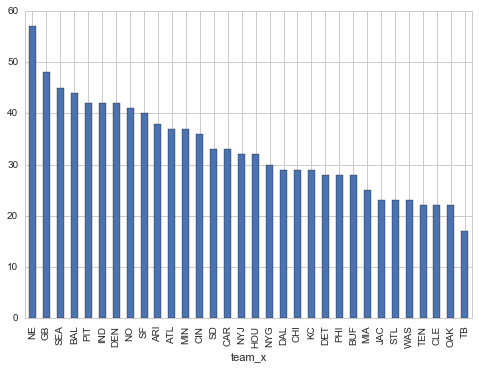

In [224]:
final_df_3.groupby(['team_x'])['winner'].sum().sort_values(ascending=False).plot(kind='bar')
final_df_3.groupby(['team_x'])['winner'].sum().sort_values(ascending=False)

team_y
CLE    45
JAC    45
STL    41
MIN    39
BUF    39
DET    39
OAK    39
WAS    38
TB     37
TEN    37
BAL    36
NYJ    34
ARI    33
SEA    33
KC     32
SF     32
MIA    32
CAR    32
HOU    31
SD     31
NYG    30
ATL    30
IND    30
CIN    29
CHI    29
PIT    28
NO     28
DAL    28
GB     27
DEN    25
PHI    25
NE     23
Name: winner, dtype: int64

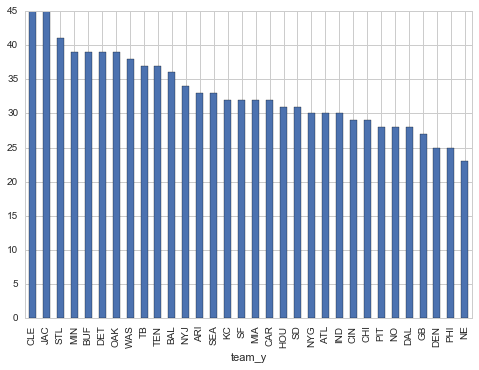

In [225]:
final_df_3.groupby(['team_y'])['winner'].sum().sort_values(ascending=False).plot(kind='bar')
final_df_3.groupby(['team_y'])['winner'].sum().sort_values(ascending=False)

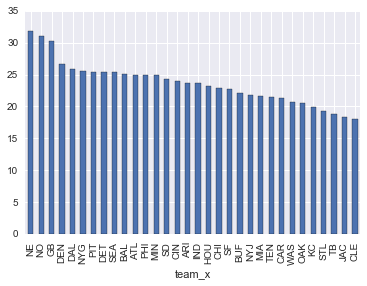

In [168]:
final_df_3.groupby(['team_x'])['score_x'].mean().sort_values(ascending=False).plot(kind='bar')

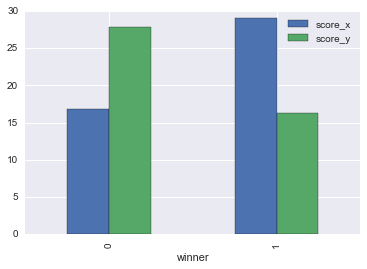

In [97]:
final_df_3.groupby(['winner'])['score_x','score_y'].mean().plot(kind='bar')

In [265]:
home_wins_by_week = pd.DataFrame(final_df_3.groupby('week')['winner'].agg(['sum','count'])['sum'] / final_df_3.groupby('week')['winner'].agg(['sum','count'])['count']).reset_index()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


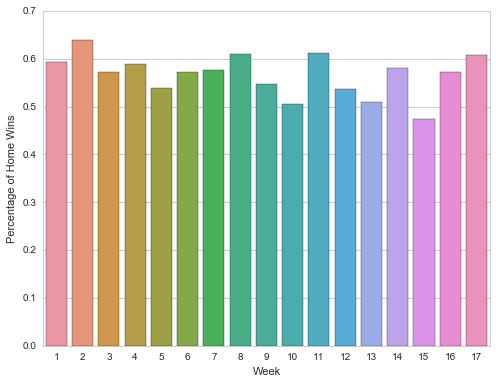

In [273]:
home_wins_by_week = home_wins_by_week.sort(0, ascending=False)

sns.set(style='whitegrid')
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
sns.barplot(x='week', y=0, data=home_wins_by_week)
ax.set(xlabel='Week', ylabel='Percentage of Home Wins')

plt.show()

In [197]:
final_df_3.columns.tolist()

['gsis_id',
 'winner',
 'team_x',
 'team_y',
 'score_x',
 'score_y',
 'week',
 'day_of_week',
 'defense_ffum_x',
 'defense_frec_x',
 'defense_frec_tds_x',
 'defense_int_x',
 'defense_int_tds_x',
 'defense_qbhit_x',
 'defense_safe_x',
 'defense_sk_x',
 'defense_tkl_x',
 'defense_xpblk_x',
 'kicking_touchback_x',
 'kicking_xpmade_x',
 'kickret_fair_x',
 'kickret_ret_x',
 'kickret_tds_x',
 'kickret_yds_x',
 'passing_cmp_air_yds_x',
 'passing_incmp_x',
 'passing_int_x',
 'passing_sk_x',
 'passing_tds_x',
 'passing_twoptm_x',
 'punting_i20_x',
 'punting_touchback_x',
 'punting_yds_x',
 'puntret_tds_x',
 'puntret_tot_x',
 'receiving_rec_x',
 'receiving_tds_x',
 'receiving_twoptm_x',
 'receiving_yds_x',
 'rushing_att_x',
 'rushing_tds_x',
 'rushing_twoptm_x',
 'rushing_yds_x',
 'turnovers_x',
 'location_x',
 'defense_ffum_y',
 'defense_frec_y',
 'defense_frec_tds_y',
 'defense_int_y',
 'defense_int_tds_y',
 'defense_qbhit_y',
 'defense_safe_y',
 'defense_sk_y',
 'defense_tkl_y',
 'defense_xpb

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


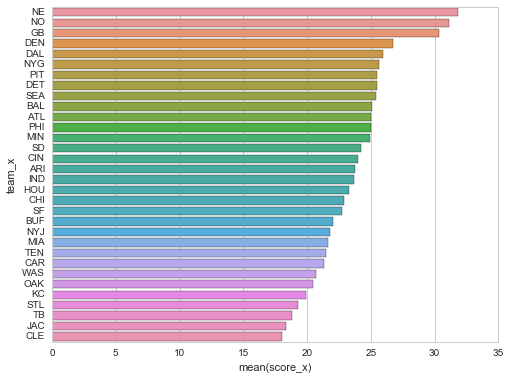

In [260]:
avg_score = final_df_3.groupby(['team_x'])['winner','score_x'].mean().reset_index().sort('score_x', ascending=False)

sns.set(style='whitegrid')
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
sns.barplot(x='score_x', y='team_x', data=avg_score,)
plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


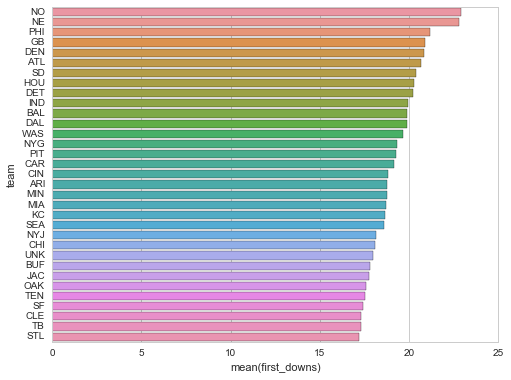

In [214]:
team_1d = drives.groupby(['gsis_id','team'])['first_downs'].sum().reset_index()
team_1d.groupby('team').mean()
sns.set(style='whitegrid')
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
sns.barplot(x='first_downs', y='team', data=team_1d.groupby('team').mean().reset_index().sort('first_downs', ascending=False))

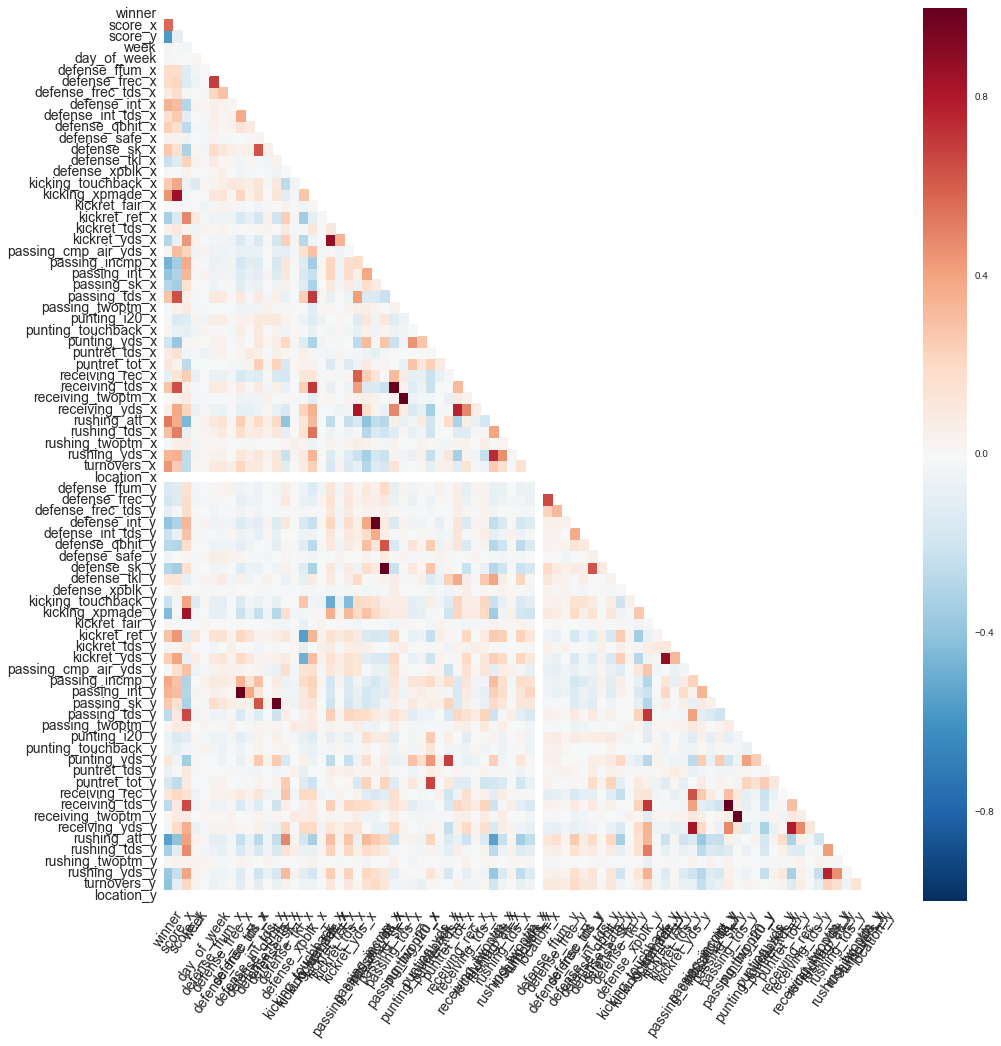

In [216]:
df_corr = final_df_3.corr()

fig, ax = plt.subplots(figsize=(16,16))

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(df_corr, mask=mask)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=55)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()